# **Customer Churn Predictor**

## **<span style="color: blue;">Business Understanding</span>**

Train a model to predict the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

The likelihood of a customer leaving the organization (churn) is influenced by a combination of factors, including:

1. Demographic characteristics (Gender, SeniorCitizen)
2. Account characteristics (Tenure, Phone Service, MultipleLines, InternetService)
3. Service features (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
4. Billing and payment characteristics (Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges)


**Hypothesis**

**Null Hypothesis (H0):**

There is no significant relationship between the identified factors (demographic characteristics, account characteristics, service features, and billing and payment characteristics) and customer churn.

**Alternative Hypothesis (H1):**

There is a significant relationship between the identified factors and customer churn, and the likelihood of churn can be predicted by a combination of these factors.



**Questions**

1. Is there a significant difference in churn rates between customers with a tenure of less than 12 months and those with a tenure of 12 months or more?

2. Do customers with online security and backup features have a lower churn rate compared to those without these features?

3. Is there a correlation between monthly charges and churn, and what is the threshold beyond which the likelihood of churn increases significantly?


**Additional Questions**

1. Do customers with multiple lines (MultipleLines = Yes) have a lower churn rate compared to those with a single line?

2. Is there a significant difference in churn rates between customers with different types of internet service (DSL, Fiber Optic, No)?

3. Does the presence of dependents (Dependents = Yes) increase the likelihood of churn?

4. Is there a correlation between the total charges (TotalCharges) and churn, and what is the threshold beyond which the likelihood of churn increases significantly?

5. Do customers with paperless billing (PaperlessBilling = Yes) have a lower churn rate compared to those without paperless billing?

6. Is there a significant difference in churn rates between customers with different payment methods (Electronic check, Mailed check, Bank transfer, Credit card)?

7. Does the length of the contract (Contract = Month-to-Month, One year, Two year) impact the likelihood of churn?




## **<span style="color: blue;">Data Understanding</span>**

### **<span style="color: skyblue;">Importation</span>**

**Importation of all necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### **<span style="color: red;">1. Training Data</span>**

**Dataset Importation & Loading**

In [2]:
# Connect to the Database Using "pyodbc"
import pyodbc
print("pyodbc is installed and imported successfully")

import pyodbc
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
login = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")

pyodbc is installed and imported successfully


In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [4]:
# connect to the Database
connection = pyodbc.connect(connection_string)
print("Connection successful")


Connection successful


In [5]:
# Query the Sql Database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Execute the query and read the results into a DataFrame
train_data = pd.read_sql(query, connection)


In [6]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### **<span style="color: skyblue;">Exploratory Data Analysis</span>**

**Data Quality Assessment & Exploring data**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [18]:
# Checking for the sum of null values

train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [9]:
# Checking for the sum of duplicated values

train_data.duplicated().sum()

np.int64(0)

In [10]:
# Checking if the training dataset (Numerical) is evenly distributed (Summary Statistics)

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [11]:
# Summary Statistics for Categorical

train_data.describe(include=['object', 'bool']).T

,count,unique,top,freq
customerID,3000,3000,1A1:U3001038-RQOST,1
gender,3000,2,Male,1537
SeniorCitizen,3000,2,False,2525
Partner,3000,2,False,1538
Dependents,3000,2,False,2070
PhoneService,3000,2,True,2731
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320


In [12]:
# Checking the Columns for Unique values

columns = train_data.columns

for column in columns:
    print (f'{column}')
    print (f'There are {train_data[column].unique().size} unique values')
    print (f'There are {train_data[column].unique()}')
    print ('=' * 50)

customerID
There are 3000 unique values
There are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
gender
There are 2 unique values
There are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
There are [False  True]
Partner
There are 2 unique values
There are [ True False]
Dependents
There are 2 unique values
There are [False  True]
tenure
There are 73 unique values
There are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
There are [False  True]
MultipleLines
There are 3 unique values
There are [None False True]
InternetService
There are 3 unique values
There are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 3 unique values
There are [False True None]
OnlineBackup
There are 3 unique values
There are [True False None]

#### **<span style="color: skyblue;">Univariate Analysis</span>**

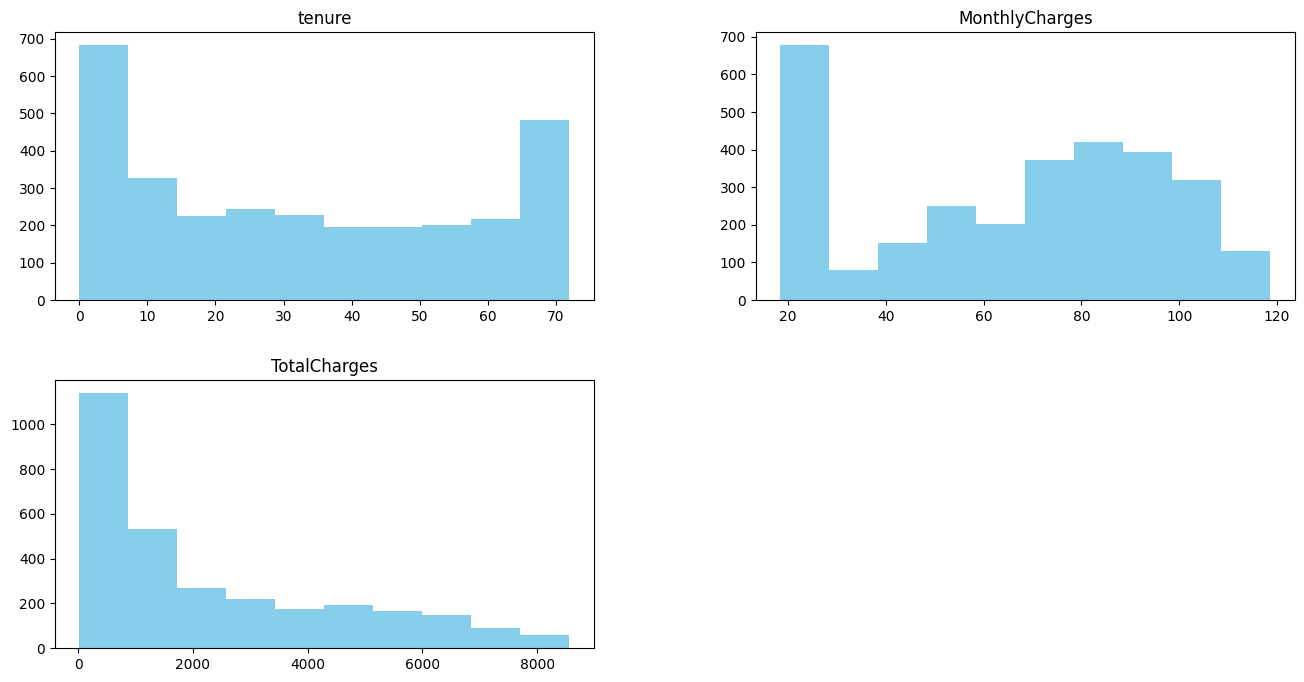

In [13]:
#Numerical Columns

train_data.hist(figsize= (16,8), grid=False, color='skyblue')
plt.title ('Numerical Features Distributions')
plt.show()

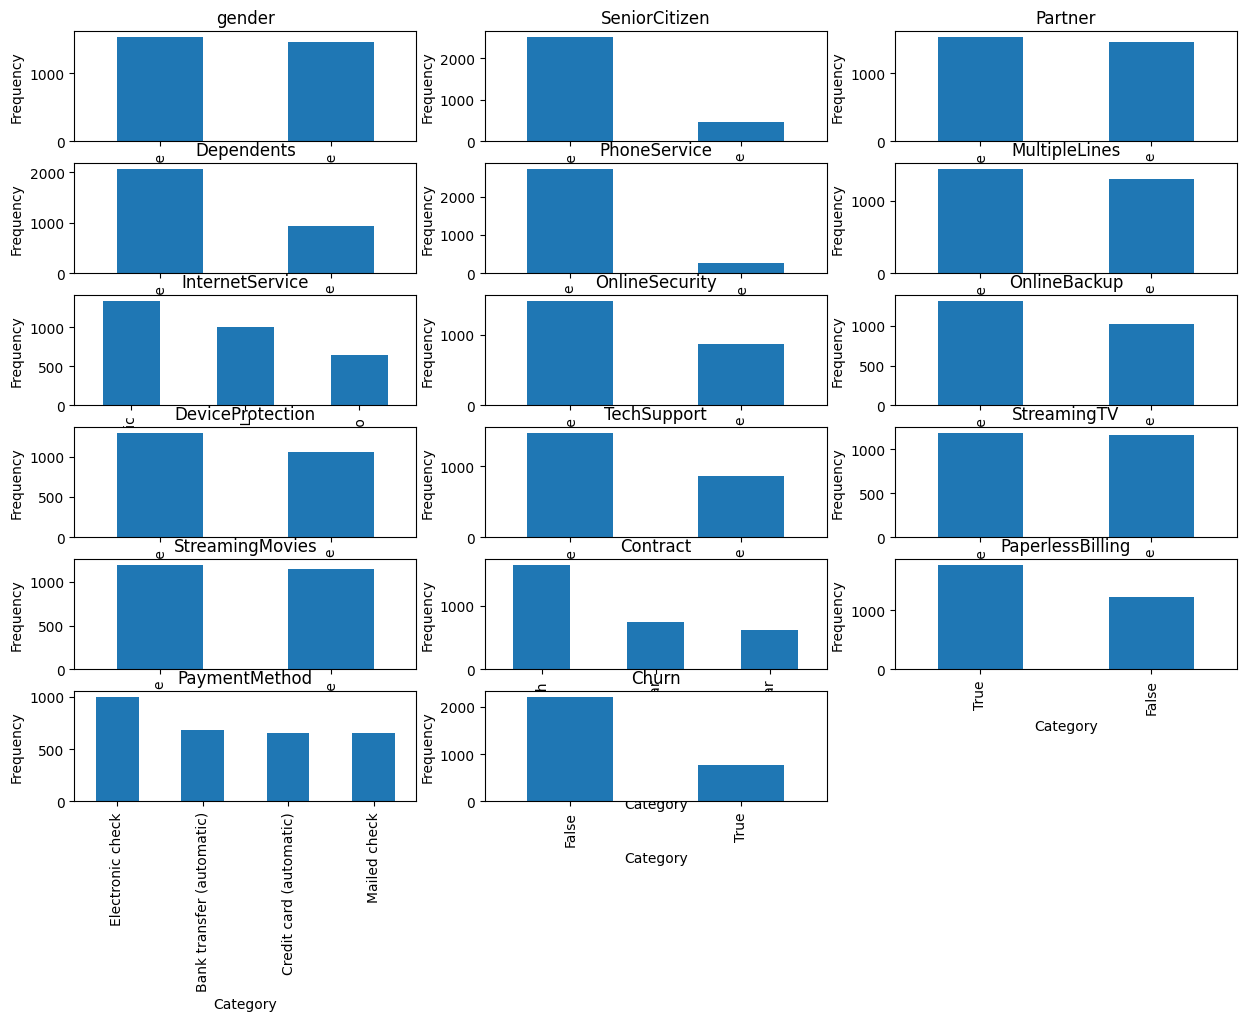

In [29]:
# Categorical Columns

# Define the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical variable
for i, var in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
	# Create a subplot for each variable
	plt.subplot(6, 3, i+1)
	# Get the value counts
	counts = train_data[var].value_counts()
	# Plot the bar chart
	counts.plot(kind='bar')
	# Set the title and labels
	plt.title(var)
	plt.xlabel('Category')
	plt.ylabel('Frequency')

# Layout and show the plot
plt.tight_layout()
plt.show()


#### **<span style="color: skyblue;">Key Insights</span>**

1. **Number of rows:** 3000 entries (rows) in the dataset.
2. **Number of columns:** 21 columns (features) in the dataset.
3. **Column data types:**
    - Boolean (bool): 5 columns (SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling)
    - Integer (int64): 1 column (tenure)
    - Float: 2 columns (MonthlyCharges, TotalCharges)
    - Object (string): 13 columns (customerID, gender, MultipleLines, InternetService, etc.)
4. **Null values:** 
    - MultipleLines: 269 null values
    - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: 651 null values each (likely due to a missing value in a related feature)
    - TotalCharges: 5 null values
    - Churn: 1 null value
5. **Duplicated values:** 0 (No duplicated values)

5. **Data distribution:** The dataset (Numerical) is not evenly distributed, with obvious skewness in [Total charges (positive skewness), tenure (Heavy-Tailed), MonthlyCharges (Semi-Lognormal)].
6. **Unique Values:** These features have unique values (they contain a 'none' value)
    - MultipleLines
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    - Churn


#### **<span style="color: red;">2. Evaluation Data</span>**

**Dataset Importation & Loading**

In [16]:
#Import CSV file

evaluation_data = pd.read_csv('../Data/LP2_Telco-churn-second-2000.csv')

evaluation_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### **<span style="color: skyblue;">Exploratory Data Analysis</span>**

**Data Quality Assessment & Exploring data**

In [17]:
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [19]:
# Checking for the sum of null values

evaluation_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# Checking for the sum of duplicated values

evaluation_data.duplicated().sum()

np.int64(0)

In [37]:
# Checking if the evaluation dataset (Numerical) is evenly distributed (Summary Statistics)

evaluation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [24]:
# Summary Statistics for Categorical

evaluation_data.describe(include=['object', 'bool']).T

,count,unique,top,freq
customerID,2043,2043,3186-AJIEK,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [25]:
# Checking the Columns for Unique values

columns = evaluation_data.columns

for column in columns:
    print (f'{column}')
    print (f'There are {evaluation_data[column].unique().size} unique values')
    print (f'There are {evaluation_data[column].unique()}')
    print ('=' * 50)

customerID
There are 2043 unique values
There are ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
There are ['Male' 'Female']
SeniorCitizen
There are 2 unique values
There are [0 1]
Partner
There are 2 unique values
There are ['No' 'Yes']
Dependents
There are 2 unique values
There are ['No' 'Yes']
tenure
There are 73 unique values
There are [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
PhoneService
There are 2 unique values
There are ['Yes' 'No']
MultipleLines
There are 3 unique values
There are ['No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
There are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 3 unique values
There are ['No' 'Yes' 'No internet service']
OnlineBackup
There are 3 unique values
There are ['No'

#### **<span style="color: skyblue;">Univariate Analysis</span>**

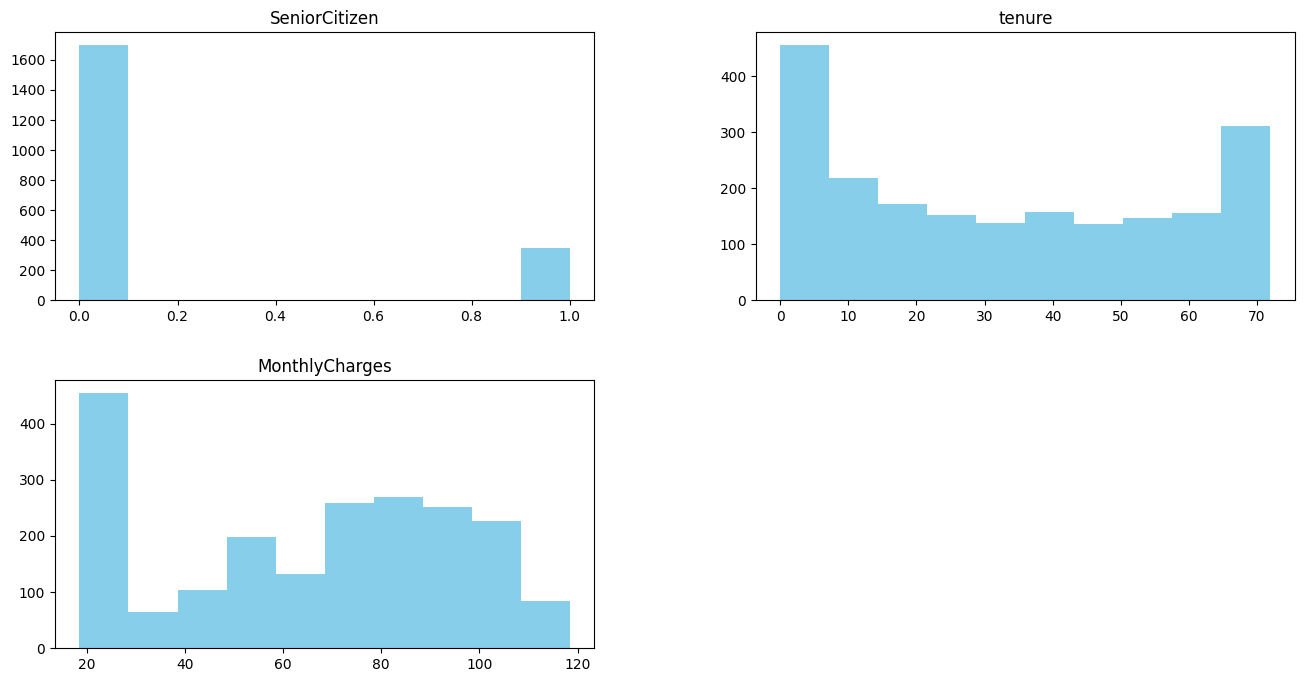

In [26]:
#Numerical Columns

evaluation_data.hist(figsize= (16,8), grid=False, color='skyblue')
plt.title ('Numerical Features Distributions')
plt.show()

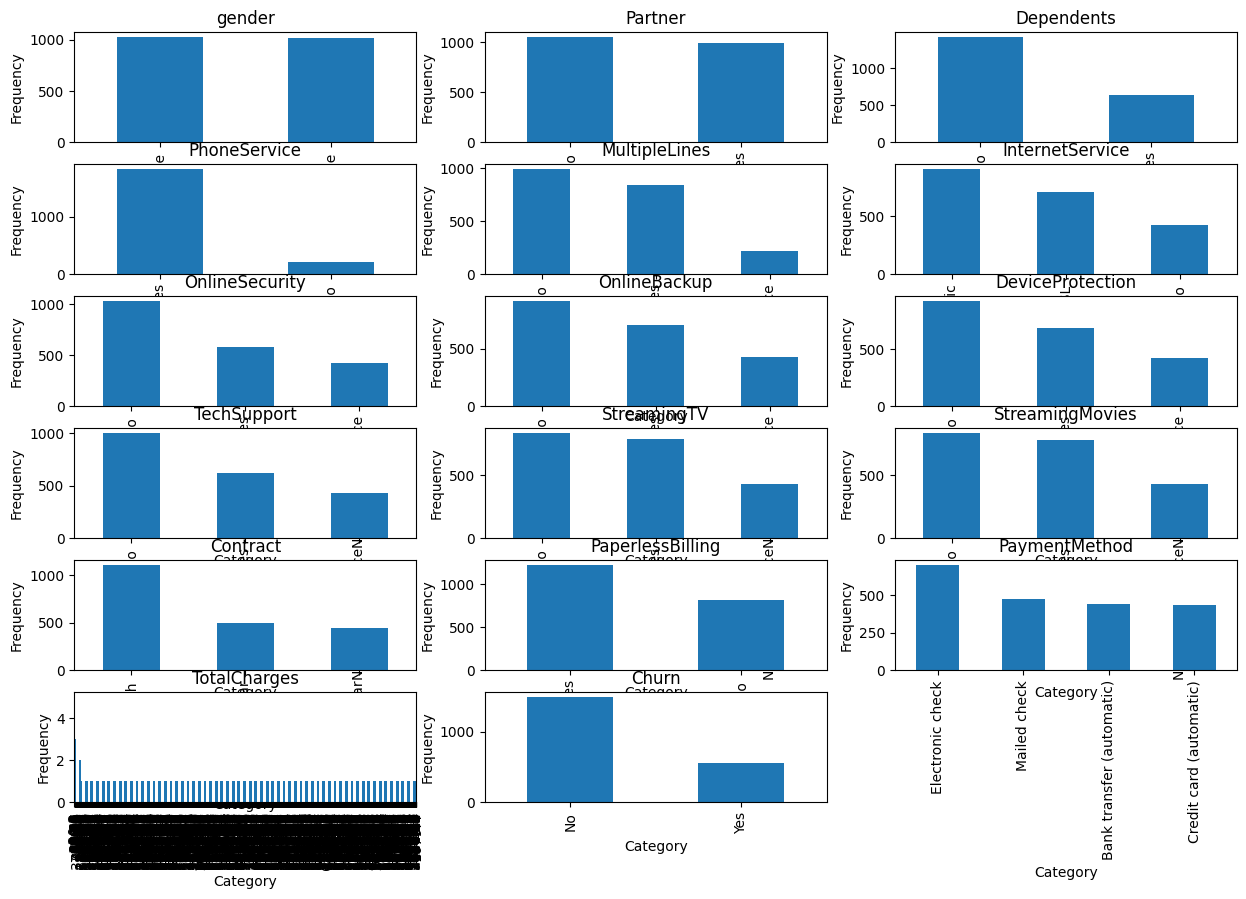

In [28]:
# Categorical Columns

# Define the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical variable
for i, var in enumerate(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']):
	# Create a subplot for each variable
	plt.subplot(6, 3, i+1)
	# Get the value counts
	counts = evaluation_data[var].value_counts()
	# Plot the bar chart
	counts.plot(kind='bar')
	# Set the title and labels
	plt.title(var)
	plt.xlabel('Category')
	plt.ylabel('Frequency')

# Layout and show the plot
plt.tight_layout()
plt.show()

#### **<span style="color: skyblue;">Key Insights</span>**

**1. Number of rows:** 2043 entries, indexed from 0 to 2042.

**2. Number of columns:** 21 columns, with various data types.

**3. Column data types:**
    - 2 integer columns (SeniorCitizen, tenure). 

    - 1 floating-point column (MonthlyCharges)
    
    - 18 object columns (strings or categorical values)
    
**4. Non-null count:** All columns have 2043 non-null values, indicating no missing data.

**Note:** Their are differences in data types for some features compared to that of Training Data. They are as follows:

    - TotalCharges: Training data (Float), Evaluation data (Object)
    
    - SeniorCitizens: Training data (Bool), Evaluation data (Integer)

**5. Duplicated values:** 0 (No duplicated values)

**6. Unique Value:** No "None" unique value. However, these features listed below have a "no online/phone service" as to "none" when compared to the training data:

    - MultipleLines
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    
**7. Data distribution:** The dataset (Numerical) is not evenly distributed


#### **<span style="color: red;">3. Testing Data</span>**

**Dataset Importation & Loading**

In [31]:
#Import Excel file

test_data = pd.read_excel('../Data/Telco-churn-last-2000.xlsx')

test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### **<span style="color: skyblue;">Exploratory Data Analysis</span>**

**Data Quality Assessment & Exploring data**

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [33]:
# Checking for the sum of null values

test_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [35]:
# Checking for the sum of duplicated values

test_data.duplicated().sum()

np.int64(0)

In [36]:
# Checking if the test dataset (Numerical) is evenly distributed (Summary Statistics)

test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


In [38]:
# Summary Statistics for Categorical

test_data.describe(include=['object', 'bool']).T

,count,unique,top,freq
customerID,2000,2000,1862-SKORY,1
gender,2000,2,Female,1004
Partner,2000,2,No,1056
Dependents,2000,2,No,1451
PhoneService,2000,2,Yes,1807
MultipleLines,2000,3,No,966
InternetService,2000,3,Fiber optic,848
OnlineSecurity,2000,3,No,991
OnlineBackup,2000,3,No,857
DeviceProtection,2000,3,No,876


In [40]:
# Checking the Columns for Unique values

columns = test_data.columns

for column in columns:
    print (f'{column}')
    print (f'There are {test_data[column].unique().size} unique values')
    print (f'There are {test_data[column].unique()}')
    print ('=' * 50)

customerID
There are 2000 unique values
There are ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
gender
There are 2 unique values
There are ['Male' 'Female']
SeniorCitizen
There are 2 unique values
There are [0 1]
Partner
There are 2 unique values
There are ['No' 'Yes']
Dependents
There are 2 unique values
There are ['No' 'Yes']
tenure
There are 73 unique values
There are [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
PhoneService
There are 2 unique values
There are ['Yes' 'No']
MultipleLines
There are 3 unique values
There are ['Yes' 'No' 'No phone service']
InternetService
There are 3 unique values
There are ['Fiber optic' 'No' 'DSL']
OnlineSecurity
There are 3 unique values
There are ['No' 'No internet service' 'Yes']
OnlineBackup
There are 3 unique values
There are ['No'

#### **<span style="color: skyblue;">Univariate Analysis</span>**

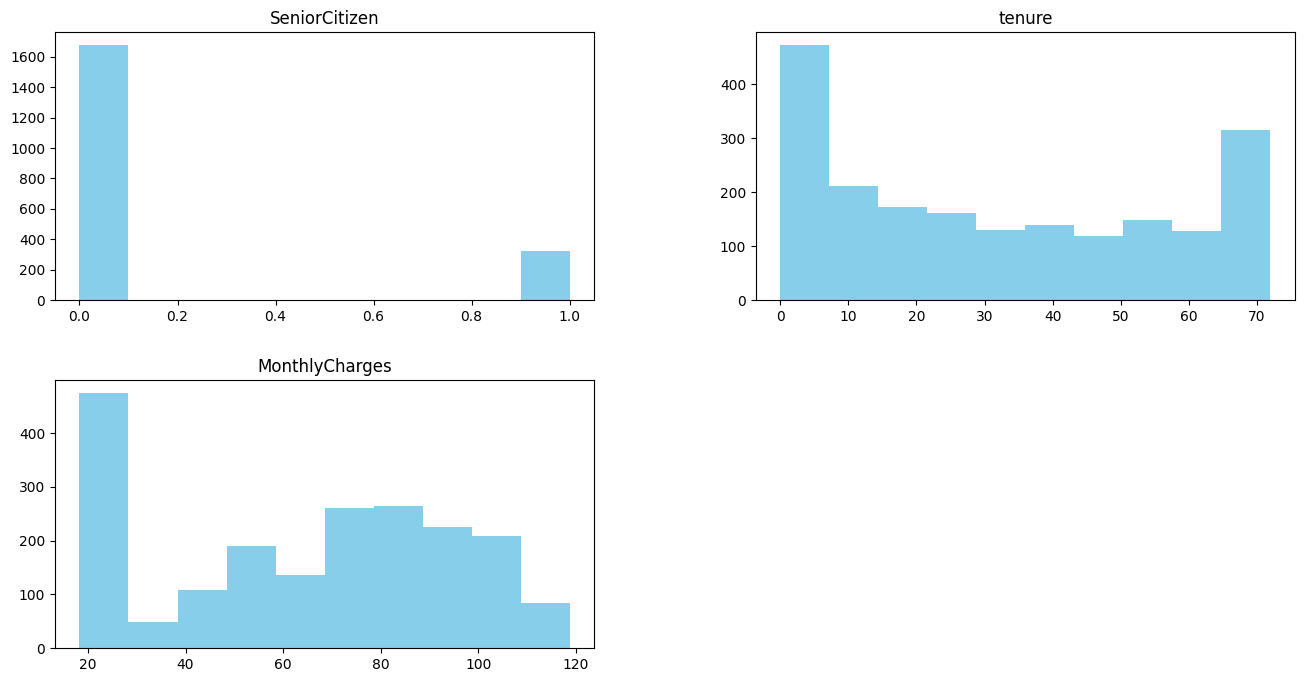

In [41]:
#Numerical Columns

test_data.hist(figsize= (16,8), grid=False, color='skyblue')
plt.title ('Numerical Features Distributions')
plt.show()

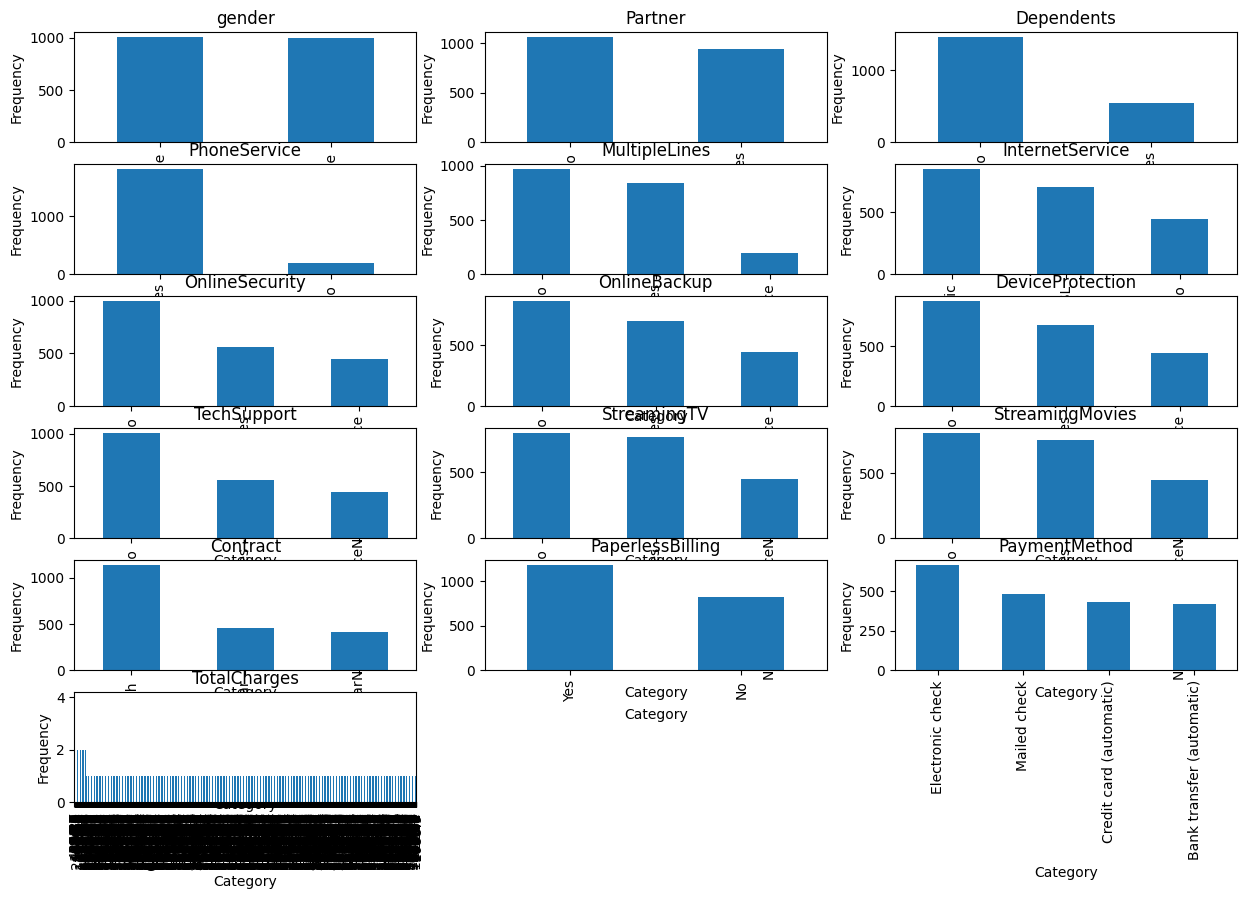

In [43]:
# Categorical Columns

# Define the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical variable
for i, var in enumerate(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']):
	# Create a subplot for each variable
	plt.subplot(6, 3, i+1)
	# Get the value counts
	counts = test_data[var].value_counts()
	# Plot the bar chart
	counts.plot(kind='bar')
	# Set the title and labels
	plt.title(var)
	plt.xlabel('Category')
	plt.ylabel('Frequency')

# Layout and show the plot
plt.tight_layout()
plt.show()

#### **<span style="color: skyblue;">Key Insights</span>**

**1. Number of records:** 2000 entries, indexed from 0 to 1999.

**2. Number of columns:** 20 columns, with various data types. No 'Churn' column

**3. Data types:**
    - 2 integer columns (SeniorCitizen, tenure)
    - 1 floating-point column (MonthlyCharges)
    - 17 object columns (strings or categorical values)

**4. No missing values:** All columns have 2000 non-null values, indicating a complete dataset.

**5. Column distribution:**
    - 2 columns with numerical data (SeniorCitizen, tenure, MonthlyCharges)
    - 17 columns with categorical data (objects)

**6. Duplicated values:** 0 (No duplicated values)

**7. Unique Value:** No "None" unique value. However, these features listed below have a "no online/phone service" as to "none" when compared to the training data:

    - MultipleLines
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    
**8. Data distribution:** The dataset (Numerical) is not evenly distributed